In [1]:
from google.colab import drive
drive.mount("/content/drive/")

import json
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

Mounted at /content/drive/


In [11]:
val_path = "/content/drive/MyDrive/NLPPROJECT/EpochLogging/ValLosses.json"
train_path = "/content/drive/MyDrive/NLPPROJECT/EpochLogging/TrainLosses.json"

with open(val_path, "r") as f:
  val_losses = json.loads(f.read())
  
train_path = "/content/drive/MyDrive/NLPPROJECT/EpochLogging/TrainLosses.json"
with open(train_path, "r") as f:
  train_losses = json.loads(f.read())

kl_values = train_losses['KL_L']
for i in range(len(kl_values)):
  kl_values[i] /= 3470

print(train_losses.keys())

del train_losses["Recon_L"]
del train_losses["Over_L"]
del train_losses["St_Ent"]
del train_losses["Co_Ent"]
del train_losses["St_Mul_"]
del train_losses["St_Adv_Acc"]

train_losses["St_Adv_L"], train_losses["St_Mul_L"] = train_losses["St_Mul_L"], train_losses["St_Adv_L"]

dict_keys(['St_Mul_L', 'Co_Mul_L', 'St_Adv_L', 'Co_Adv_L', 'Recon_L', 'KL_L', 'Over_L', 'St_Ent', 'Co_Ent', 'St_Mul_', 'St_Adv_Acc'])


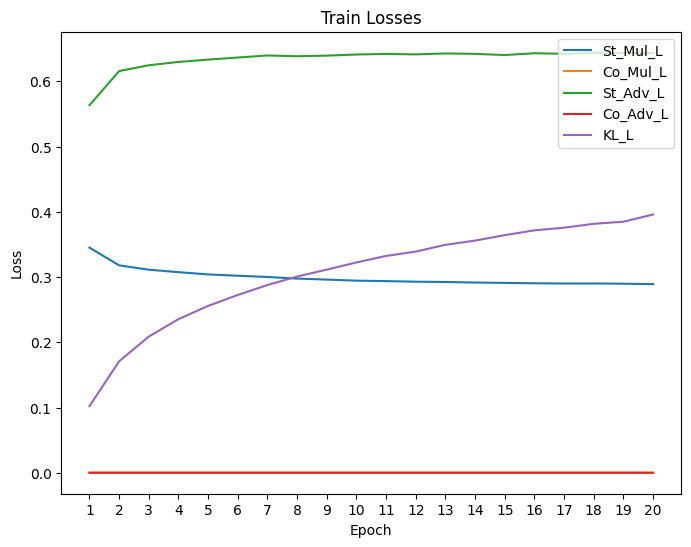

In [12]:
# sns.color_palette("tab10")
plt.figure(figsize=(8, 6))

plot_x = np.arange(1, 21)
loss_name = np.array(list(train_losses.keys()))
loss_data = np.array(list(train_losses.values()))

# plt.figure(figsize=(16, 8))
for i in range(len(loss_name)):
  plt.plot(plot_x, loss_data[i], label=loss_name[i])

plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.title("Train Losses")
plt.xticks(plot_x)
plt.legend()

plt.show()

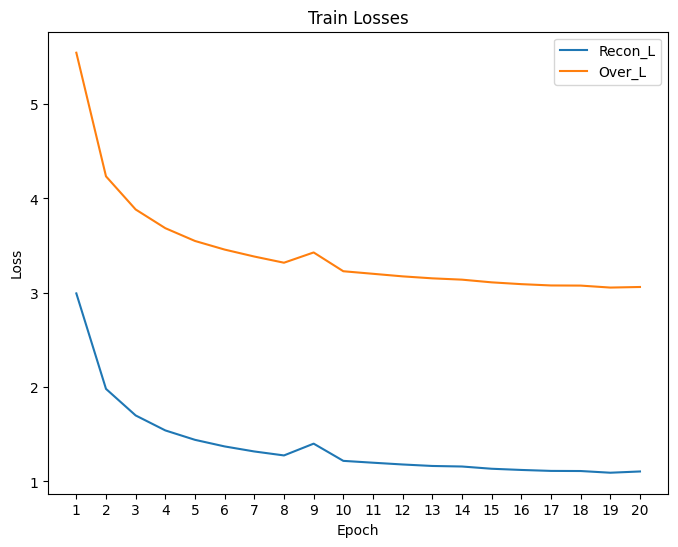

In [14]:
train_path = "/content/drive/MyDrive/NLPPROJECT/EpochLogging/TrainLosses.json"
with open(train_path, "r") as f:
  train_losses = json.loads(f.read())

plt.figure(figsize=(8, 6))

del_k = []
for k in train_losses.keys():
  if k not in ["Recon_L", "Over_L"]:
    del_k.append(k)

for k in del_k:
  del train_losses[k]

plot_x = np.arange(1, 21)
loss_name = np.array(list(train_losses.keys()))
loss_data = np.array(list(train_losses.values()))

# plt.figure(figsize=(16, 8))
for i in range(len(loss_name)):
  plt.plot(plot_x, loss_data[i], label=loss_name[i])

plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.title("Train Losses")
plt.xticks(plot_x)
plt.legend()

plt.show()